In [163]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
data1 = pd.read_csv('../../data/energy_dataset.csv')
data2 = pd.read_csv('../../data/weather_features.csv')
dataVal = data2.loc[data2["city_name"]=='Valencia']


# merge data
df = pd.merge(data1, dataVal,left_on="time",right_on="dt_iso")

# delete duplicates
for i in range(len(df)):
    if(df.iloc[i]["time"] != df.iloc[i]["dt_iso"]):
        df.drop(i,axis=0,inplace=True)
        i-=1
df=df.drop_duplicates()
df=df.drop(columns=["temp_max","temp_min"])



def sortedCorr(data1,data2,df):
    cList = []
    # list of tuples of data and correlation
    for col1 in data2.columns:
        for col2 in data1.columns:
            if col1 != col2 and col1 in df and col2 in df:
                cf=df[[col1,col2]].corr()
                if col1 in cf and col2 in cf:
                    num = cf[col2].iloc[0]
                    if np.isnan(num)==False and num<1:
                        cList.append((num,col1,col2))

    # sort tuples based on correlation
    cList.sort(reverse=True,key = lambda x: abs(x[0]))
    return cList

humidity | generation solar
-0.5048091873594712


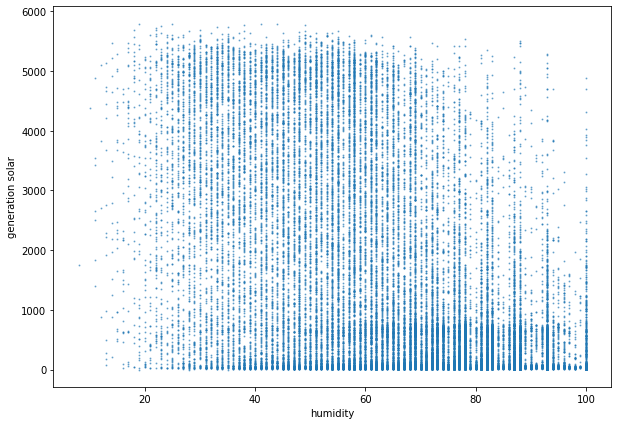

humidity | forecast solar day ahead
-0.503141229104782


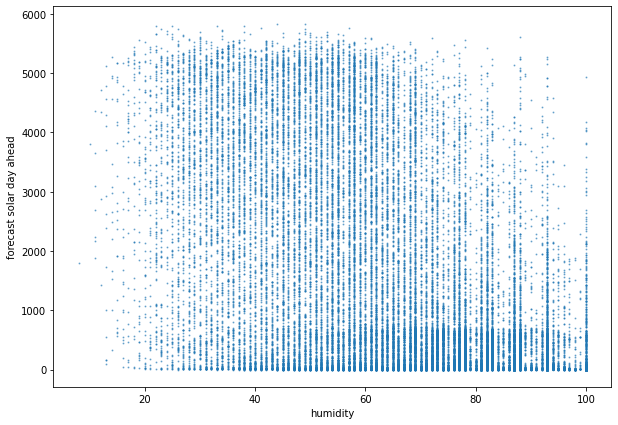

temp | forecast solar day ahead
0.46060201763310843


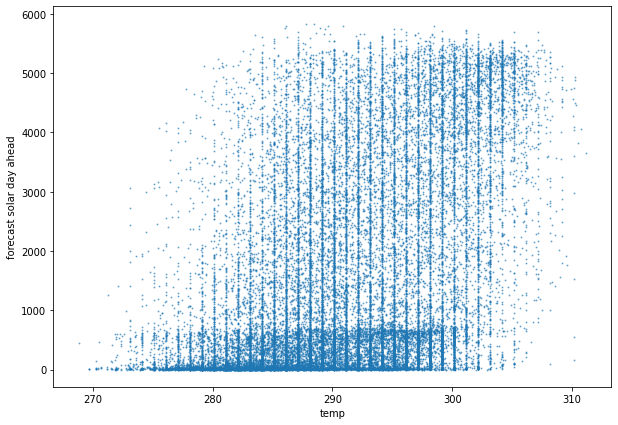

temp | generation solar
0.4568417105182435


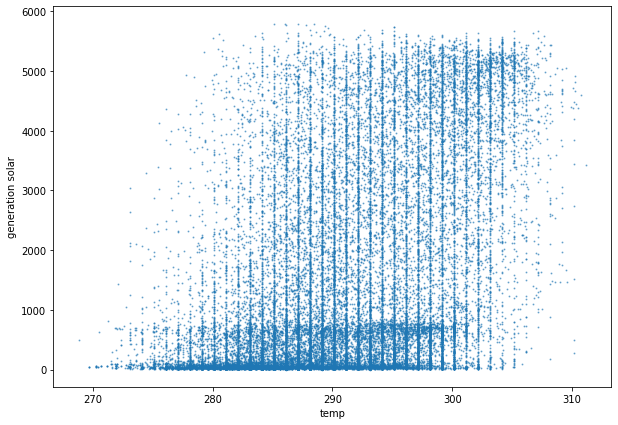

humidity | total load forecast
-0.3155250497899263


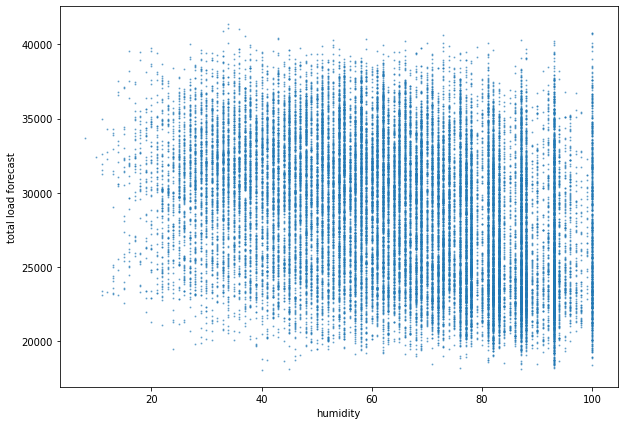

humidity | total load actual
-0.3138695884138716


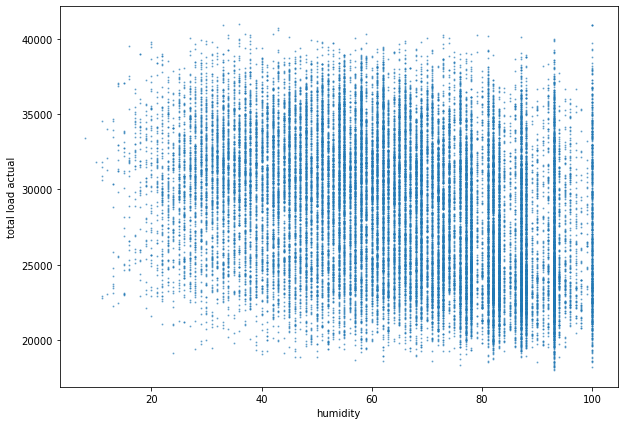

wind_speed | generation wind onshore
0.26350534933156305


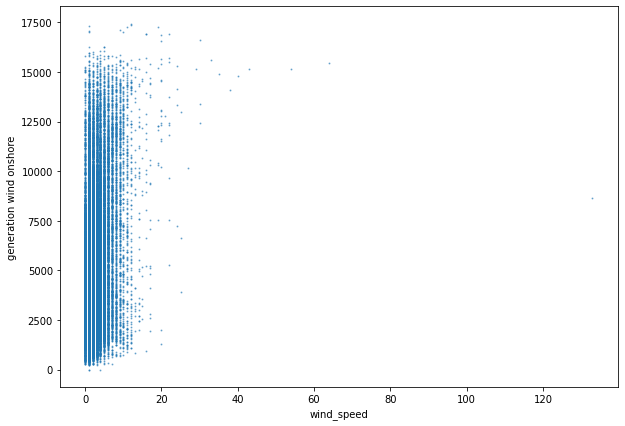

wind_speed | forecast wind onshore day ahead
0.2633962381116773


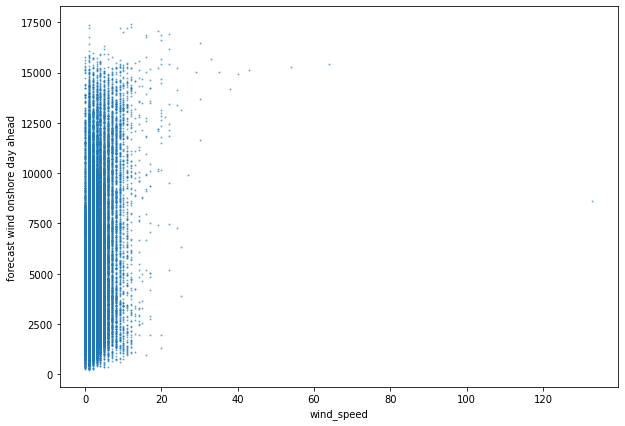

temp | total load actual
0.22092578782321032


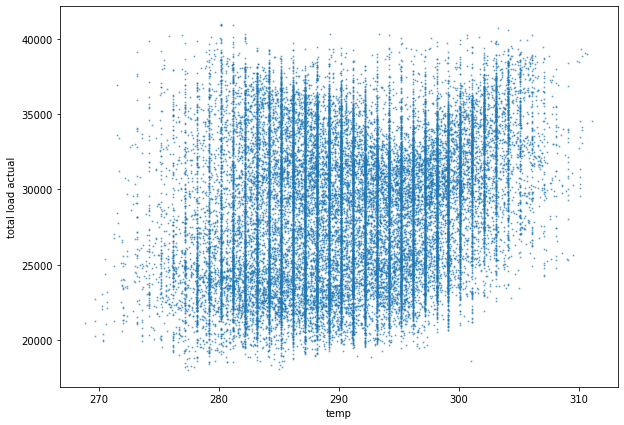

temp | total load forecast
0.21908619650009725


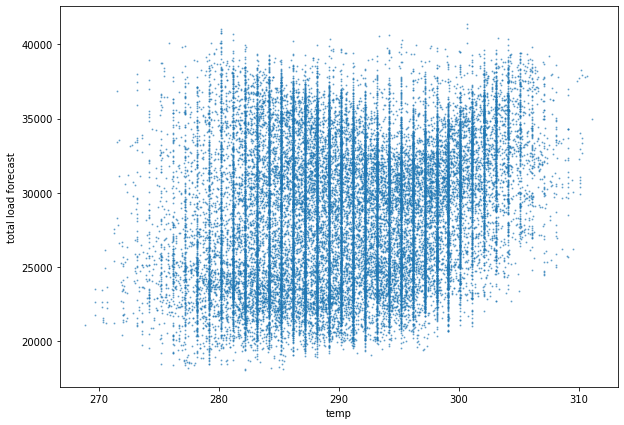

temp | generation hydro pumped storage consumption
-0.21717377700740614


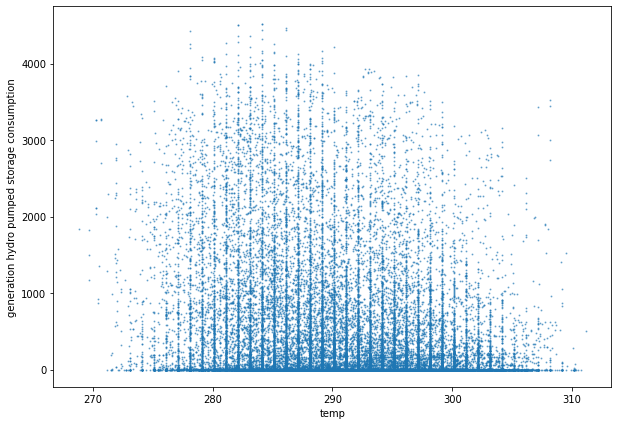

humidity | generation wind onshore
-0.1644156812243874


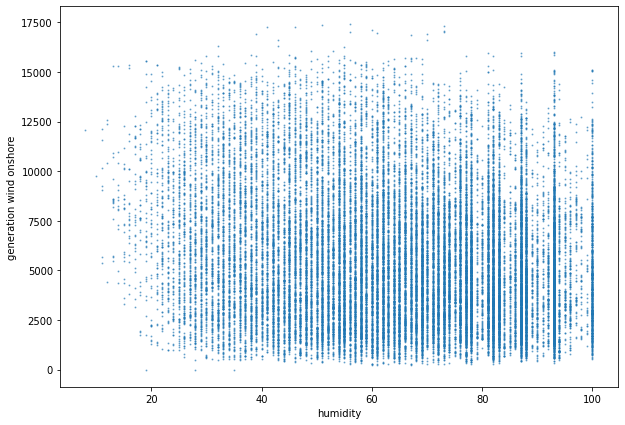

humidity | forecast wind onshore day ahead
-0.16271462090745928


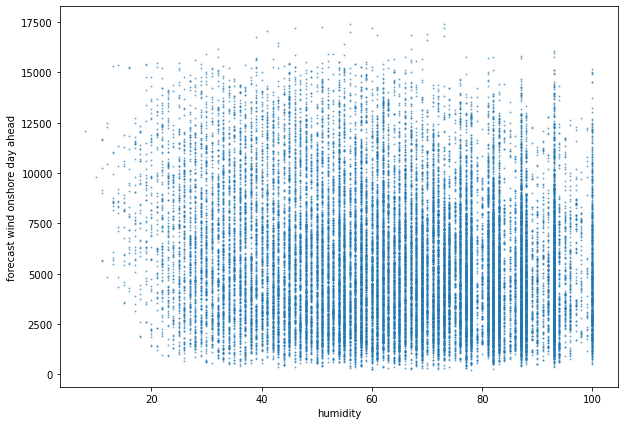

humidity | generation hydro water reservoir
-0.16177100549634593


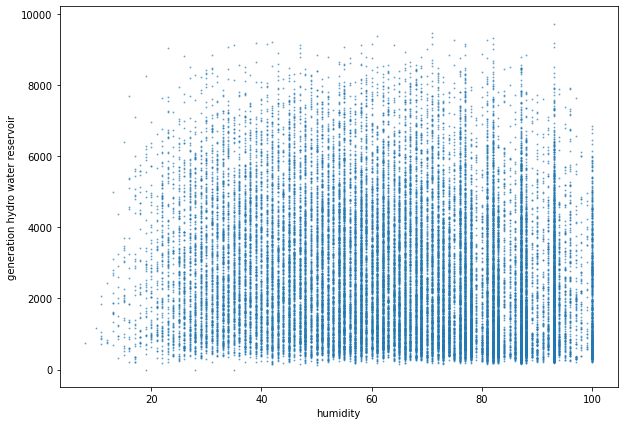

humidity | generation hydro run-of-river and poundage
-0.16053180114167329


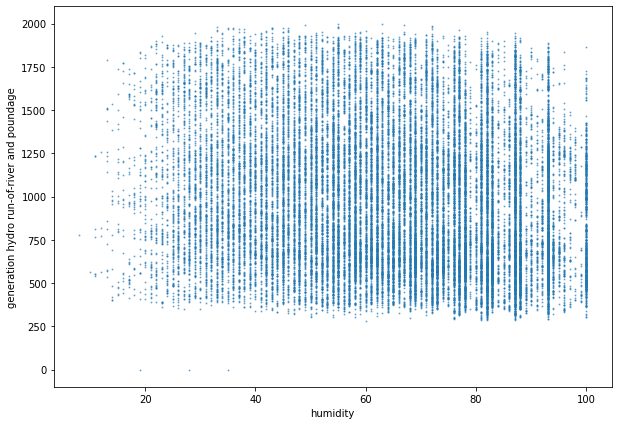

wind_speed | forecast solar day ahead
0.1560816705605247


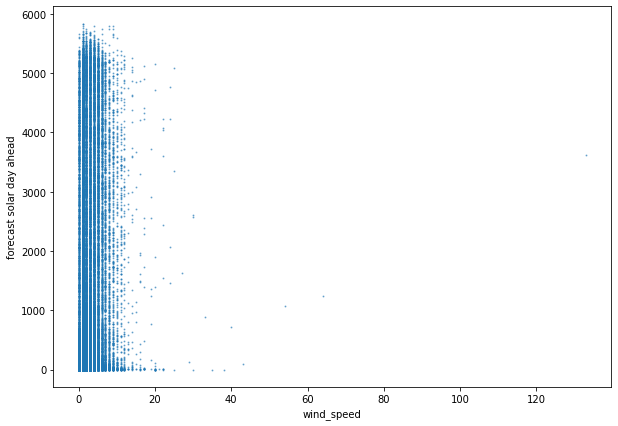

wind_speed | generation solar
0.15591081349960387


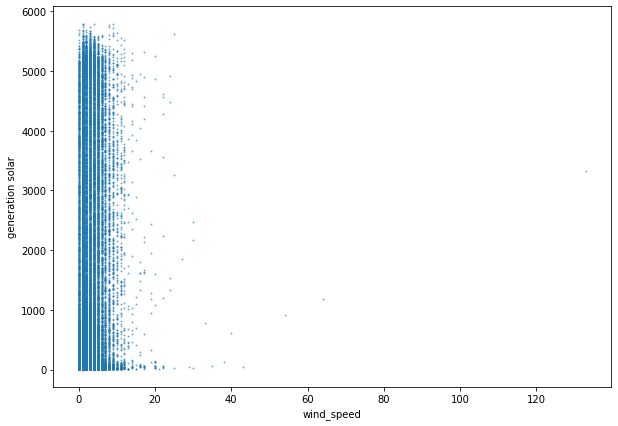

wind_speed | total load forecast
0.14838242476778146


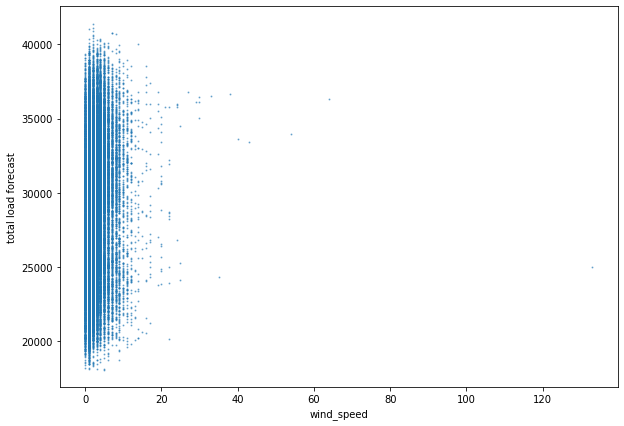

wind_speed | total load actual
0.14809503805472


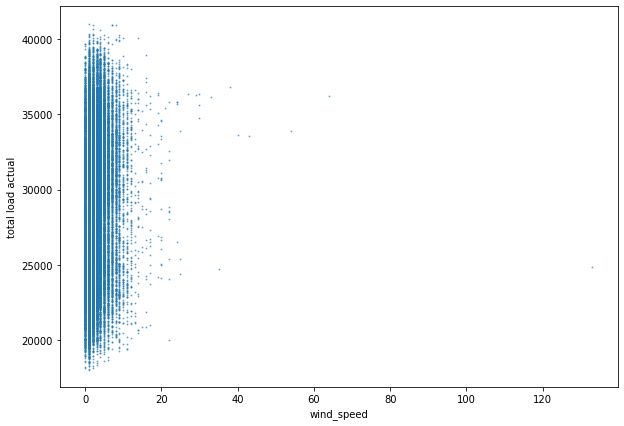

wind_speed | generation hydro run-of-river and poundage
0.13703515638105832


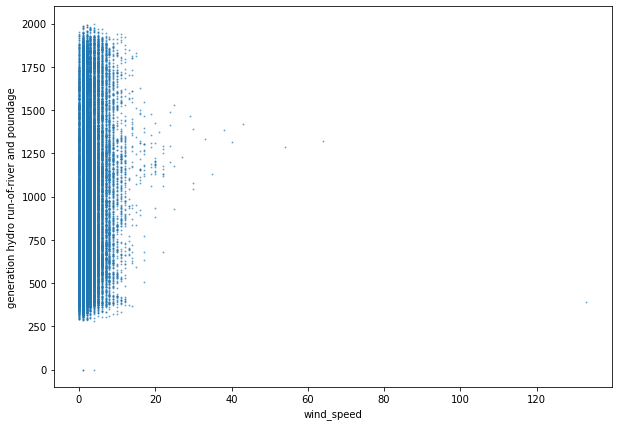

In [40]:
cList = sortedCorr(data1,dataVal,df)
for tup in cList[0:20]:
    # tuple data
    print(tup[1],"|",tup[2])
    print(tup[0])

    # scatter plot
    plt.figure(figsize=(10,7))
    plt.scatter(df[[tup[1]]],df[[tup[2]]], color='tab:blue', alpha=.5, s=1)
    plt.xlabel(tup[1])
    plt.ylabel(tup[2])
    plt.show()

# Get average values from all cities

In [100]:
names = pd.unique(data2["city_name"])
namedData=[]
for name in names:
    cityData = data2.loc[data2["city_name"]==name]
    dfn = pd.merge(data1, cityData,left_on="time",right_on="dt_iso")
    
    print(dfn.shape)
    dfn=dfn.drop_duplicates("time")
    print(dfn.shape)
    
    namedData.append(dfn)
    
print("Finished")

(35145, 46)
(35064, 46)
(36267, 46)
(35064, 46)
(35951, 46)
(35064, 46)
(35476, 46)
(35064, 46)
(35557, 46)
(35064, 46)
Finished


In [127]:
total=namedData[0]
for i in range(1,len(namedData)):
    print(i)
    total=total+namedData[i]

1
2
3
4


In [114]:
total.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:002015-01-01 00:00:00+0...              2235.0   
1  2015-01-01 01:00:00+01:002015-01-01 01:00:00+0...              2245.0   
2  2015-01-01 02:00:00+01:002015-01-01 02:00:00+0...              2240.0   
3  2015-01-01 03:00:00+01:002015-01-01 03:00:00+0...              2190.0   
4  2015-01-01 04:00:00+01:002015-01-01 04:00:00+0...              2140.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                1645.0                                 0.0   
1                                1640.0                                 0.0   
2                                1615.0                                 0.0   
3                                1270.0                                 0.0   
4                                 935.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                24220.0                      24105.0                  810.0   
1                25980.0                      23775.0                  790.0   
2                24285.0                      22905.0                  785.0   
3                21570.0                      20655.0                  800.0   
4                20650.0                      19200.0                  780.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0  ...        10.0     676.0      0.0      0.0      0.0         0.0   
1  ...        10.0     679.0      0.0      0.0      0.0         0.0   
2  ...        12.0     595.0      0.0      0.0      0.0         0.0   
3  ...        12.0     596.0      0.0      0.0      0.0         0.0   
4  ...        12.0     592.0      0.0      0.0      0.0         0.0   

   weather_id               weather_main  \
0      4000.0  clearclearclearclearclear   
1      4000.0  clearclearclearclearclear   
2      4000.0  clearclearclearclearclear   
3      4000.0  clearclearclearclearclear   
4      4000.0  clearclearclearclearclear   

                                 weather_description    weather_icon  
0  sky is clearsky is clearsky is clearsky is cle...  01n01n0101n01n  
1  sky is clearsky is clearsky is clearsky is cle...  01n01n0101n01n  
2  sky is clearsky is clearsky is clearsky is cle...  01n01n0101n01n  
3  sky is clearsky is clearsky is clearsky is cle...  01n01n0101n01n  
4  sky is clearsky is clearsky is clearsky is cle...  01n01n0101n01n  

[5 rows x 46 columns]

In [152]:
totalNum=total.select_dtypes(["number"])
avg = totalNum.applymap(lambda x: x/5)

## Finished finding avg values

In [161]:
avg.head()

generation biomass  generation fossil brown coal/lignite  \
0               447.0                                 329.0   
1               449.0                                 328.0   
2               448.0                                 323.0   
3               438.0                                 254.0   
4               428.0                                 187.0   

   generation fossil coal-derived gas  generation fossil gas  \
0                                 0.0                 4844.0   
1                                 0.0                 5196.0   
2                                 0.0                 4857.0   
3                                 0.0                 4314.0   
4                                 0.0                 4130.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4755.0                  158.0   
2                       4581.0                  157.0   
3                       4131.0                  160.0   
4                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   generation hydro pumped storage aggregated  ...    temp_max  pressure  \
0                                         NaN  ...  272.491463    1016.4   
1                                         NaN  ...  272.512700    1016.2   
2                                         NaN  ...  272.099137    1016.8   
3                                         NaN  ...  272.089469    1016.6   
4                                         NaN  ...  272.145900    1016.6   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0      82.4         2.0     135.2      0.0      0.0      0.0         0.0   
1      82.4         2.0     135.8      0.0      0.0      0.0         0.0   
2      82.0         2.4     119.0      0.0      0.0      0.0         0.0   
3      82.0         2.4     119.2      0.0      0.0      0.0         0.0   
4      82.0         2.4     118.4      0.0      0.0      0.0         0.0   

   weather_id  
0       800.0  
1       800.0  
2       800.0  
3       800.0  
4       800.0  

[5 rows x 40 columns]

<AxesSubplot:>

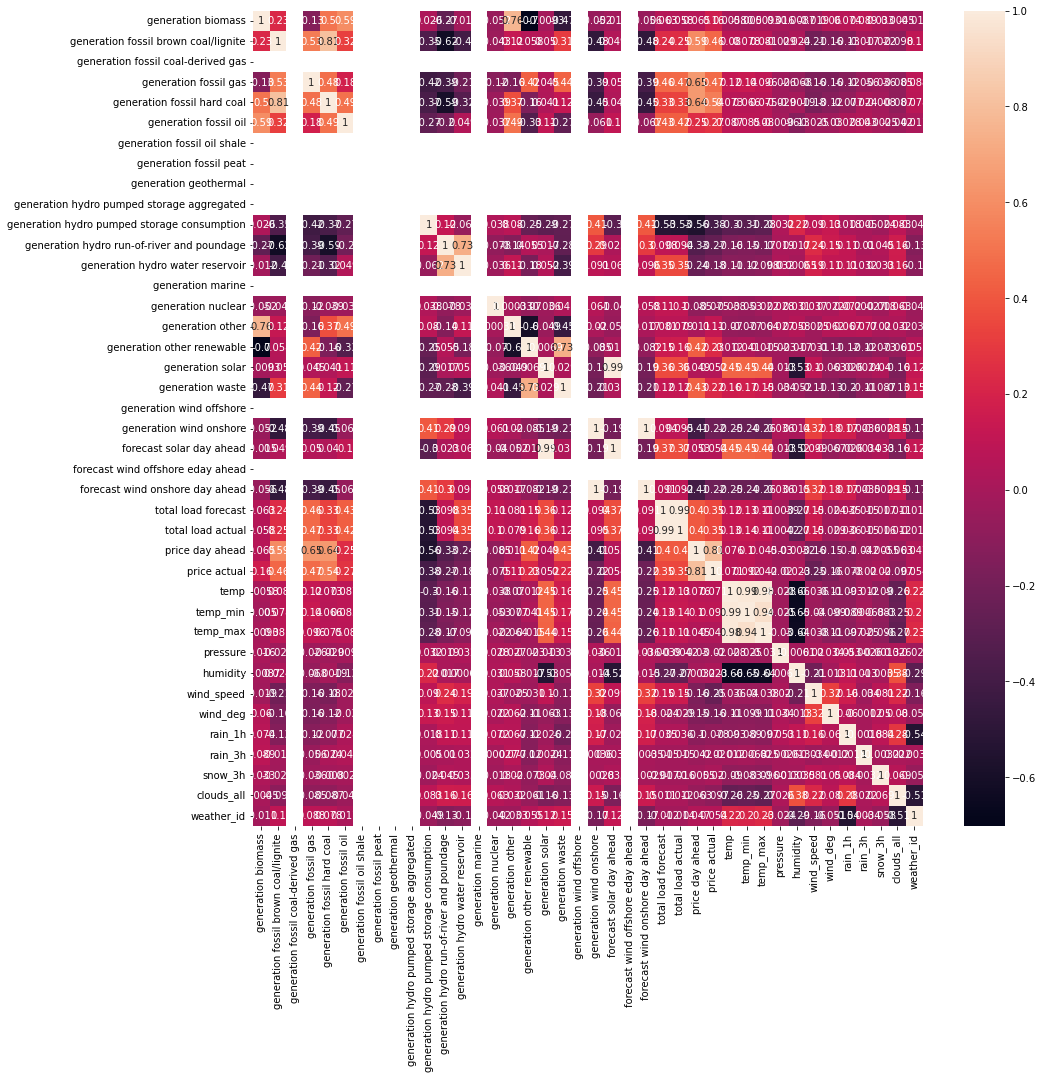

In [144]:
plt.figure(figsize=(15,15))
sns.heatmap(avg.corr(), annot=True, fmt='.2g')

In [164]:
energyAvg = avg.loc[:, avg.columns.isin(data1.columns)]
weatherAvg = avg.loc[:, avg.columns.isin(data2.columns)]
avgCorr=sortedCorr(energyAvg,weatherAvg,avg)

humidity | generation solar
-0.5292781404738623


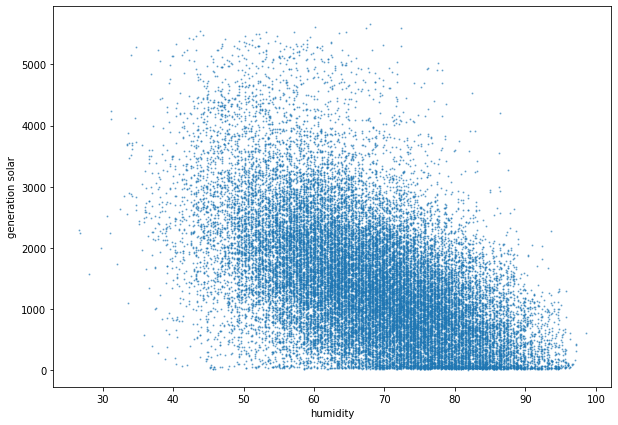

humidity | forecast solar day ahead
-0.5243971454399289


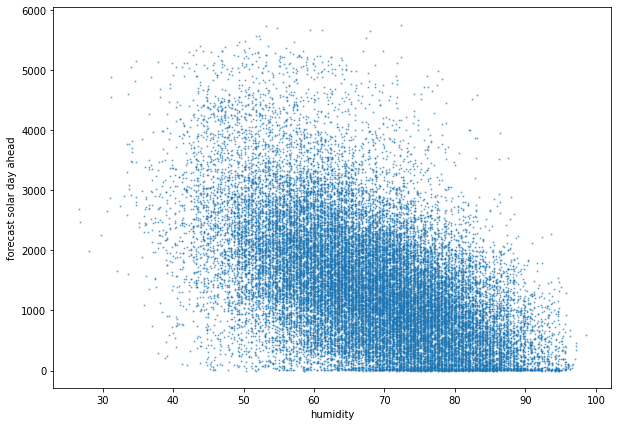

temp_min | forecast solar day ahead
0.4517198460835894


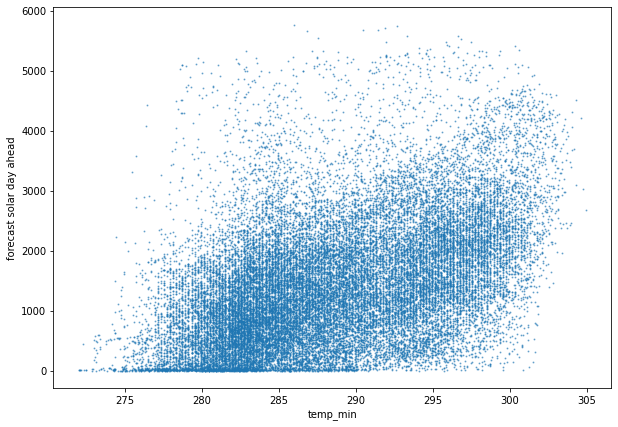

temp | forecast solar day ahead
0.45038412962149005


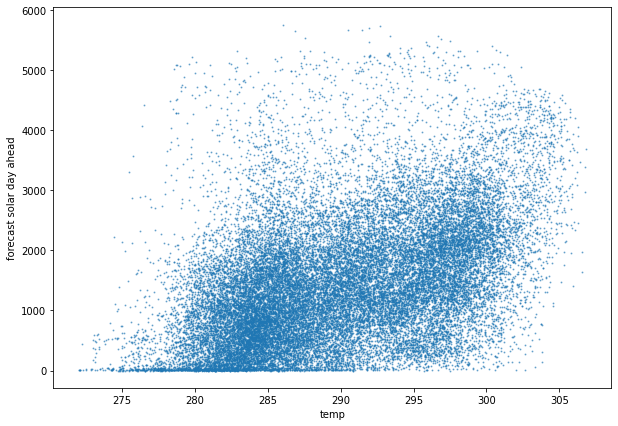

temp_min | generation solar
0.44761306388676125


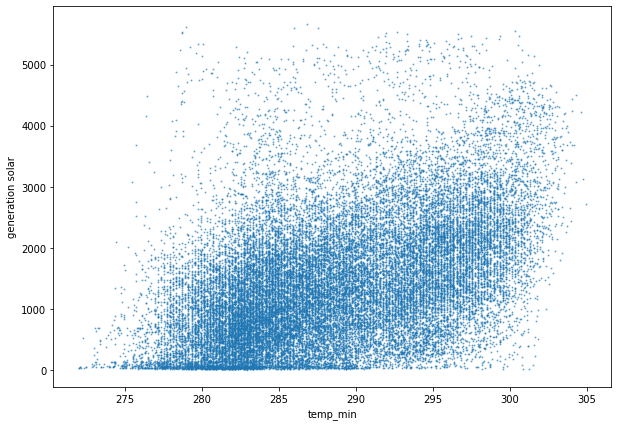

temp | generation solar
0.44632876786542586


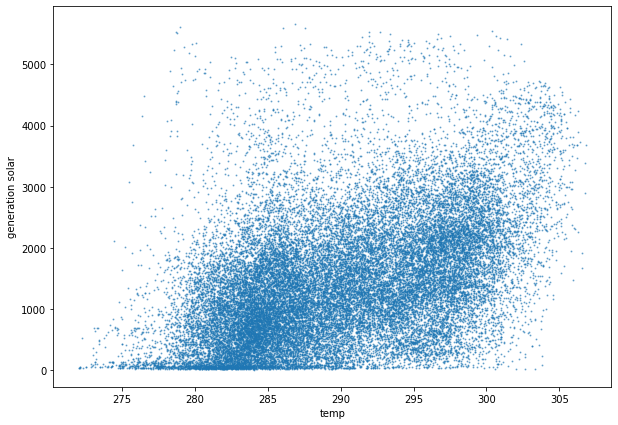

temp_max | forecast solar day ahead
0.4395970419294634


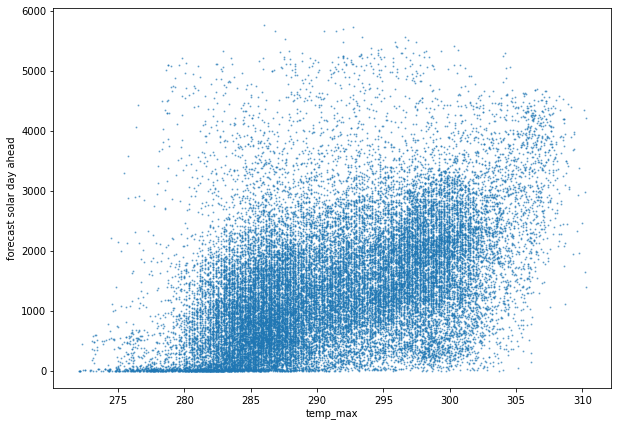

temp_max | generation solar
0.4354091683658256


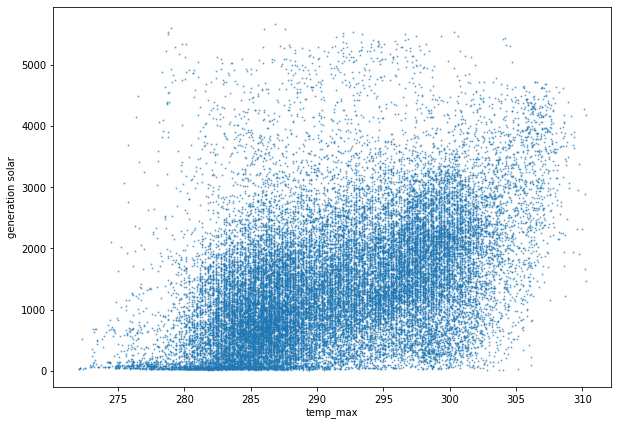

wind_speed | generation wind onshore
0.32222300340392496


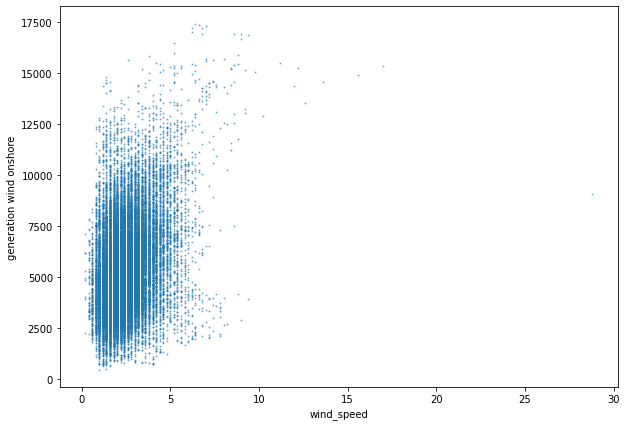

wind_speed | forecast wind onshore day ahead
0.32111505235963694


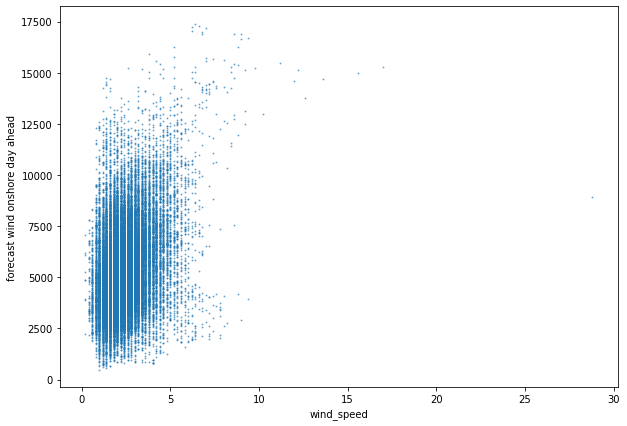

temp_min | generation hydro pumped storage consumption
-0.30934654973043596


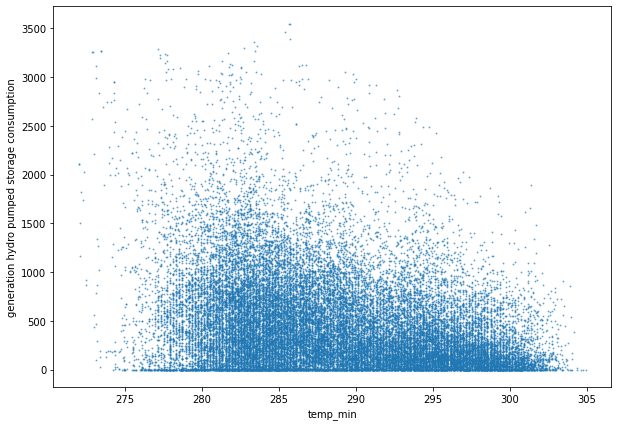

temp | generation hydro pumped storage consumption
-0.3010084076976083


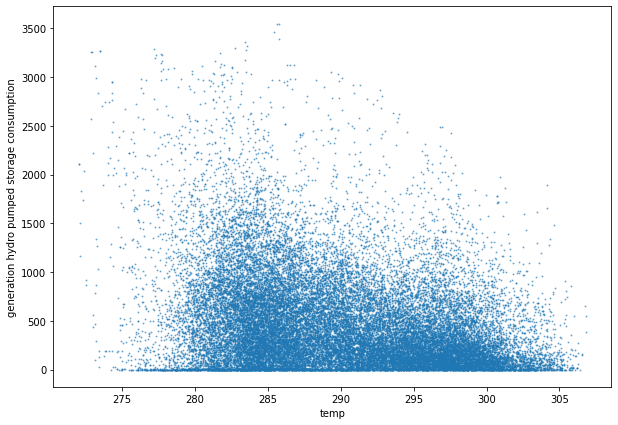

temp_max | generation hydro pumped storage consumption
-0.28447883969779086


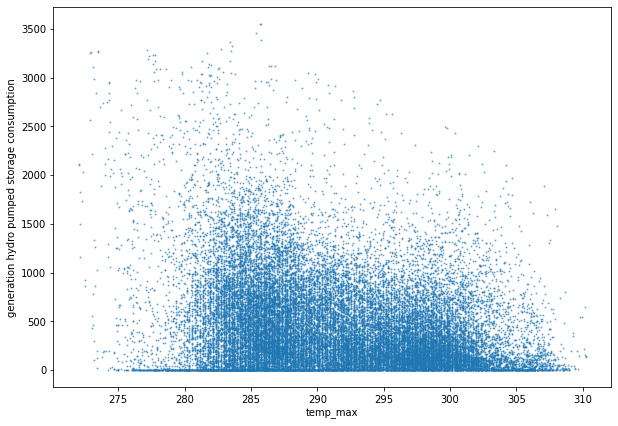

humidity | total load actual
-0.2664866489612815


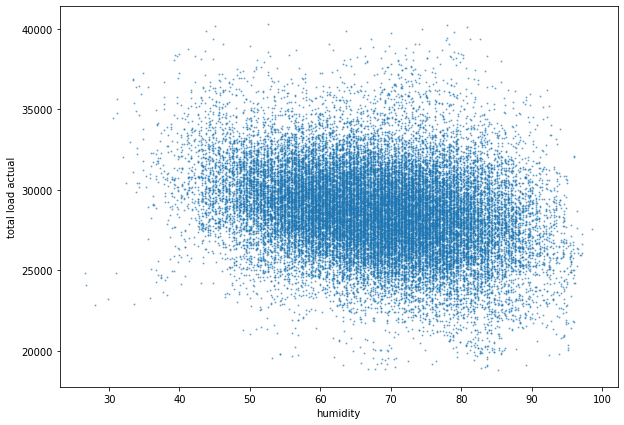

humidity | total load forecast
-0.2657917628204247


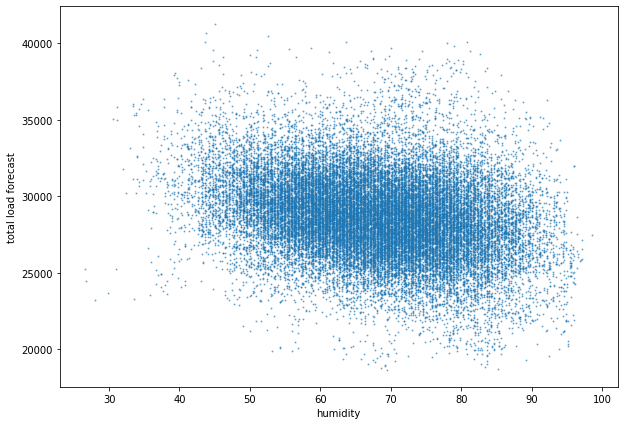

temp_max | generation wind onshore
-0.2553662564832547


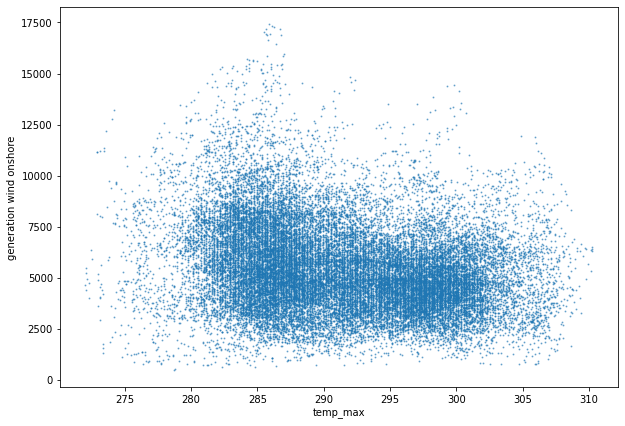

temp_max | forecast wind onshore day ahead
-0.25514457667877133


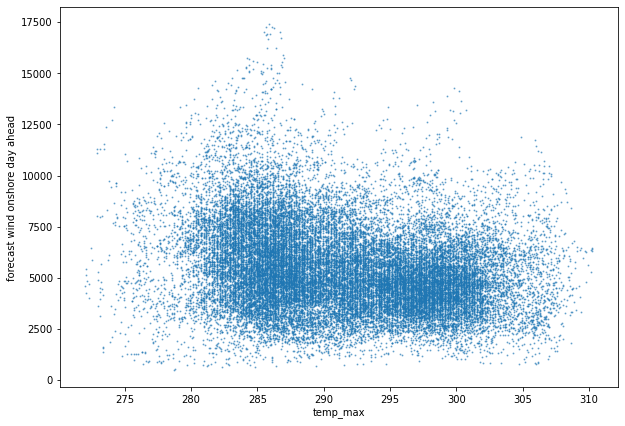

temp | generation wind onshore
-0.24877569827539475


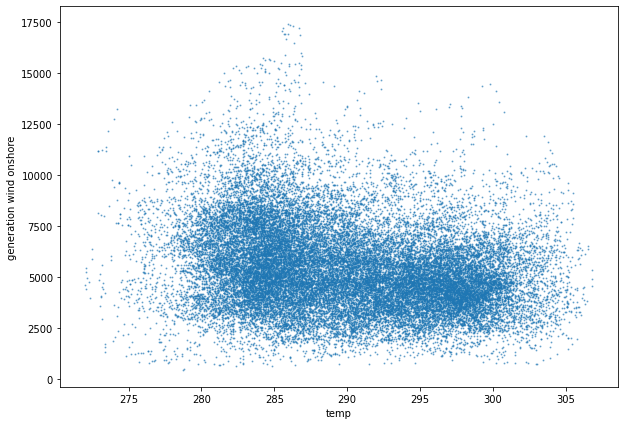

wind_speed | price actual
-0.24863588057342942


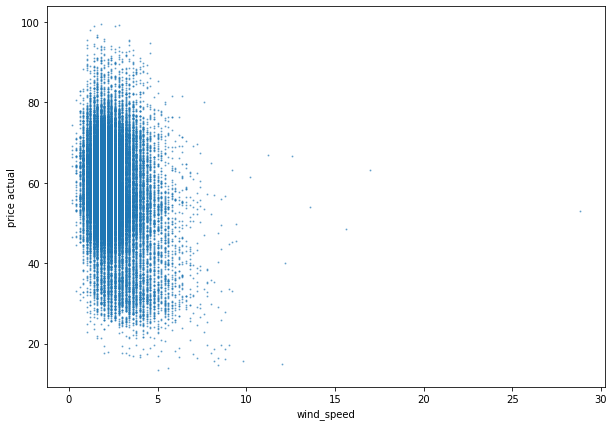

temp | forecast wind onshore day ahead
-0.24829421765031132


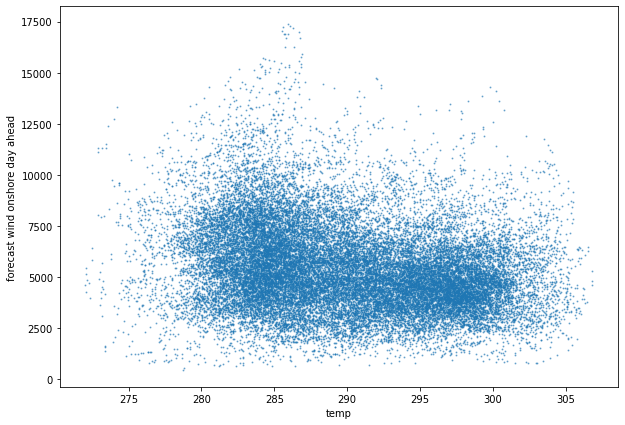

In [166]:
for tup in avgCorr[0:20]:
    # tuple data
    print(tup[1],"|",tup[2])
    print(tup[0])

    # scatter plot
    plt.figure(figsize=(10,7))
    plt.scatter(avg[[tup[1]]],avg[[tup[2]]], color='tab:blue', alpha=.5, s=1)
    plt.xlabel(tup[1])
    plt.ylabel(tup[2])
    plt.show()